In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
X=train.iloc[:,:-1].values
Y=train['label'].values
X=X/255.0
test=test/255.0
X = X.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
Y=Y.reshape(-1,1)

In [3]:
Y.shape

(42000, 1)

In [4]:
X.shape

(42000, 28, 28, 1)

In [5]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(train, test_size=0.1, random_state=2)

train_y, test_y = train_X.pop("label"), test_X.pop("label")

train_X, test_X = train_X.values, test_X.values


In [6]:
train_X.shape,test_X.shape,train_y.shape, test_y.shape

((37800, 784), (4200, 784), (37800,), (4200,))

In [7]:
from keras.utils.np_utils import to_categorical


In [8]:
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
train_X, test_X = train_X / 255.0, test_X / 255.0


train_y = to_categorical(train_y)
test_y = to_categorical(test_y)



In [9]:
test.shape

(28000, 28, 28, 1)

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import tensorflow as tf 
def c_m():
    model = tf.keras.models.Sequential([
#                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(112 , recurrent_dropout = 0.5 , dropout = 0.5,return_sequences = True)),

              tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (28,28,1),padding='same'),
#               tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
#               tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#               tf.keras.layers.Dropout(.5),
#               tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
#               tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
#               tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
#               tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
#               tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
#               tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D(pool_size=(2, 2)),      
#               tf.keras.layers.Dropout(.5),
              tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
              tf.keras.layers.BatchNormalization(),
              tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'),
#               tf.keras.layers.BatchNormalization(),
              tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512,activation=tf.nn.relu),
#               tf.keras.layers.Dense(56,activation=tf.nn.relu),
              tf.keras.layers.Dropout(.5),
#               tf.keras.layers.Dense(10,activation='relu'),
#               tf.keras.layers.Dense(10,activation='relu'),
              tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                ])

    return model

In [11]:
m = c_m()

In [12]:
from keras.optimizers import Adam
optimizer = Adam(lr=0.01, epsilon=1e-05, decay=0.0)

In [13]:
m.compile(optimizer = 'Adam' , loss = "categorical_crossentropy", metrics=["acc"])

In [14]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.12, # Randomly zoom image 
        width_shift_range=0.14,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.14,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
callbacks1 = [ 
    EarlyStopping(monitor = 'val_acc', patience = 10), 
    ReduceLROnPlateau(monitor = 'val_acc', patience=3, 
                                            verbose=1, 
                                            factor=0.25, 
                                            min_lr=0.0001), 
    ModelCheckpoint(filepath = './modelbest.hdf5', save_best_only=True)
]

Epoch 1/30
1181/1181 [==============================] - 32s 27ms/step - loss: 2.2978 - acc: 0.2317 - val_loss: 1.7720 - val_acc: 0.3111
Epoch 2/30
1181/1181 [==============================] - 31s 26ms/step - loss: 1.6378 - acc: 0.3830 - val_loss: 1.1531 - val_acc: 0.5828
Epoch 3/30
1181/1181 [==============================] - 32s 27ms/step - loss: 1.0076 - acc: 0.6391 - val_loss: 0.2252 - val_acc: 0.9344
Epoch 4/30
1181/1181 [==============================] - 31s 26ms/step - loss: 0.1960 - acc: 0.9493 - val_loss: 0.0988 - val_acc: 0.9735
Epoch 5/30
1181/1181 [==============================] - 32s 27ms/step - loss: 0.1337 - acc: 0.9664 - val_loss: 0.1015 - val_acc: 0.9745
Epoch 6/30
1181/1181 [==============================] - 31s 27ms/step - loss: 0.1151 - acc: 0.9716 - val_loss: 0.0588 - val_acc: 0.9821
Epoch 7/30
1181/1181 [==============================] - 31s 26ms/step - loss: 0.1013 - acc: 0.9743 - val_loss: 0.0625 - val_acc: 0.9819
Epoch 8/30
1181/1181 [==========================

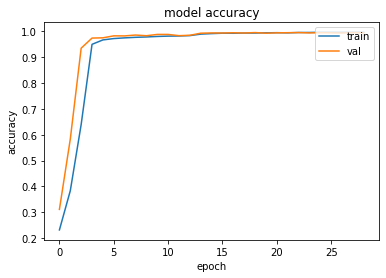

In [16]:
history=m.fit(datagen.flow(train_X, train_y),
                    epochs = 30,
                  batch_size=128,
                    steps_per_epoch = train_X.shape[0] // 32,
                    verbose = 1,
                    validation_data=datagen.flow(test_X, test_y),
                    validation_steps = test_X.shape[0] // 32,
                    callbacks=callbacks1)
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [17]:
from keras.models import load_model
model = load_model('./modelbest.hdf5')

In [18]:
loss , acc =  model.evaluate(test_X, test_y)
loss,acc

132/132 [==============================] - 1s 8ms/step - loss: 0.0235 - acc: 0.9950


(0.023520631715655327, 0.9950000047683716)